In [ ]:
from mlxtend.plotting import plot_decision_regions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [ ]:
df = pd.read_csv('/content/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [ ]:
df_copy = df.copy(deep = True)
df_copy[['Glucose','BloodPressure','SkinThickness','BMI']] = df_copy[['Glucose','BloodPressure','SkinThickness','BMI']].replace(0,np.NaN)

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,0,33.6,0.627,50,1
1,1,85.0,66.0,29.0,0,26.6,0.351,31,0
2,8,183.0,64.0,NaN,0,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168,43.1,2.288,33,1


In [ ]:
print(df_copy.isnull().sum())

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                       0
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64


In [ ]:
df_copy['Glucose'].fillna(df_copy['Glucose'].mean(), inplace = True)
df_copy['BloodPressure'].fillna(df_copy['BloodPressure'].mean(), inplace = True)
df_copy['SkinThickness'].fillna(df_copy['SkinThickness'].mean(), inplace = True)
df_copy['Insulin'].fillna(df_copy['Insulin'].mean(), inplace = True)
df_copy['BMI'].fillna(df_copy['BMI'].mean(), inplace = True)



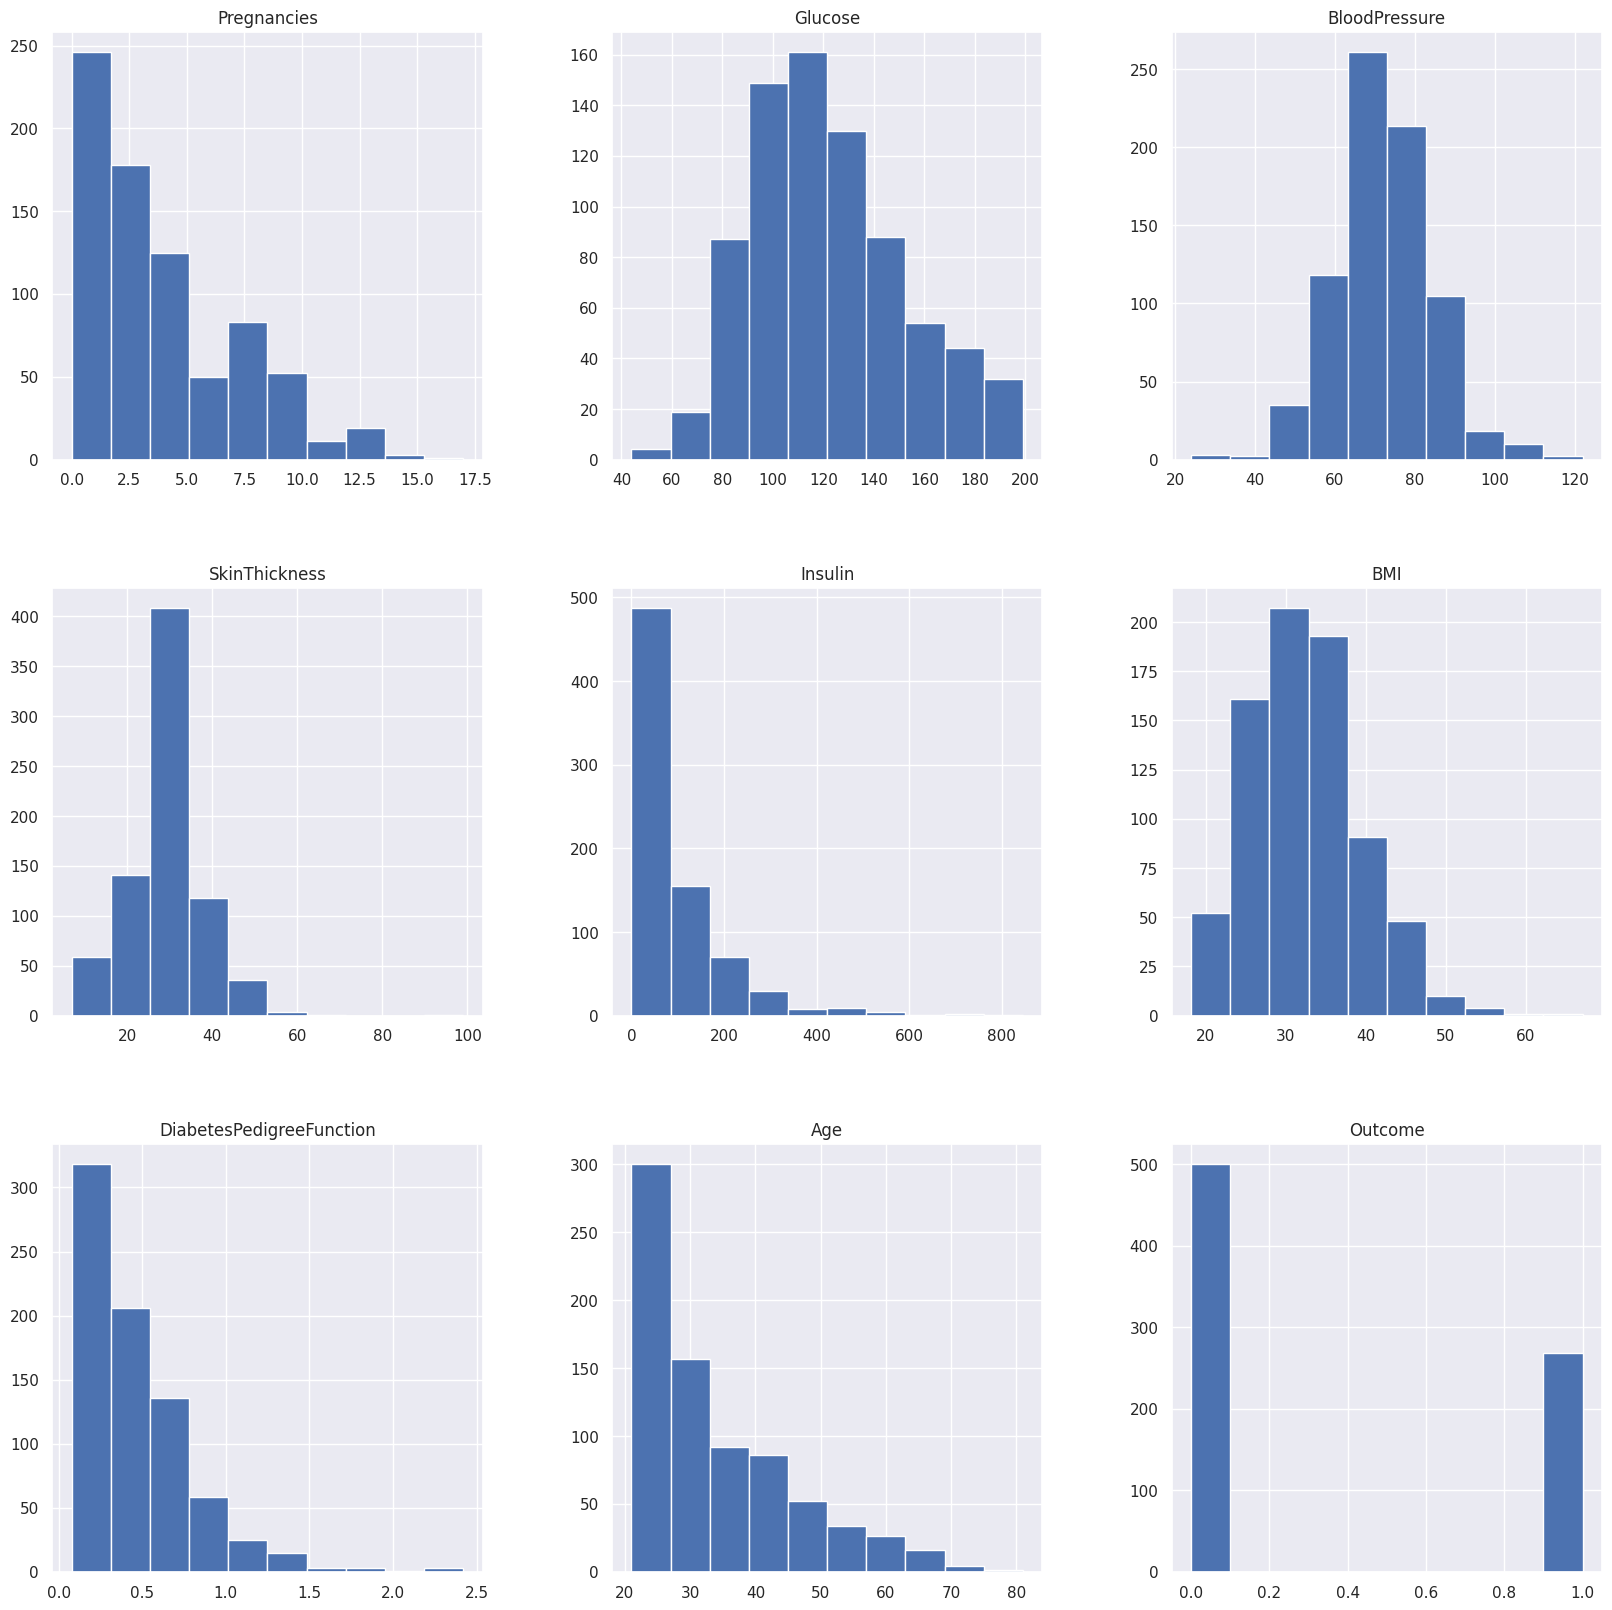

In [ ]:
p = df_copy.hist(figsize = (20,20))

In [ ]:
df_copy.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.00000,0,33.6,0.627,50,1
1,1,85.0,66.0,29.00000,0,26.6,0.351,31,0
2,8,183.0,64.0,29.15342,0,23.3,0.672,32,1
3,1,89.0,66.0,23.00000,94,28.1,0.167,21,0
4,0,137.0,40.0,35.00000,168,43.1,2.288,33,1


<Axes: >

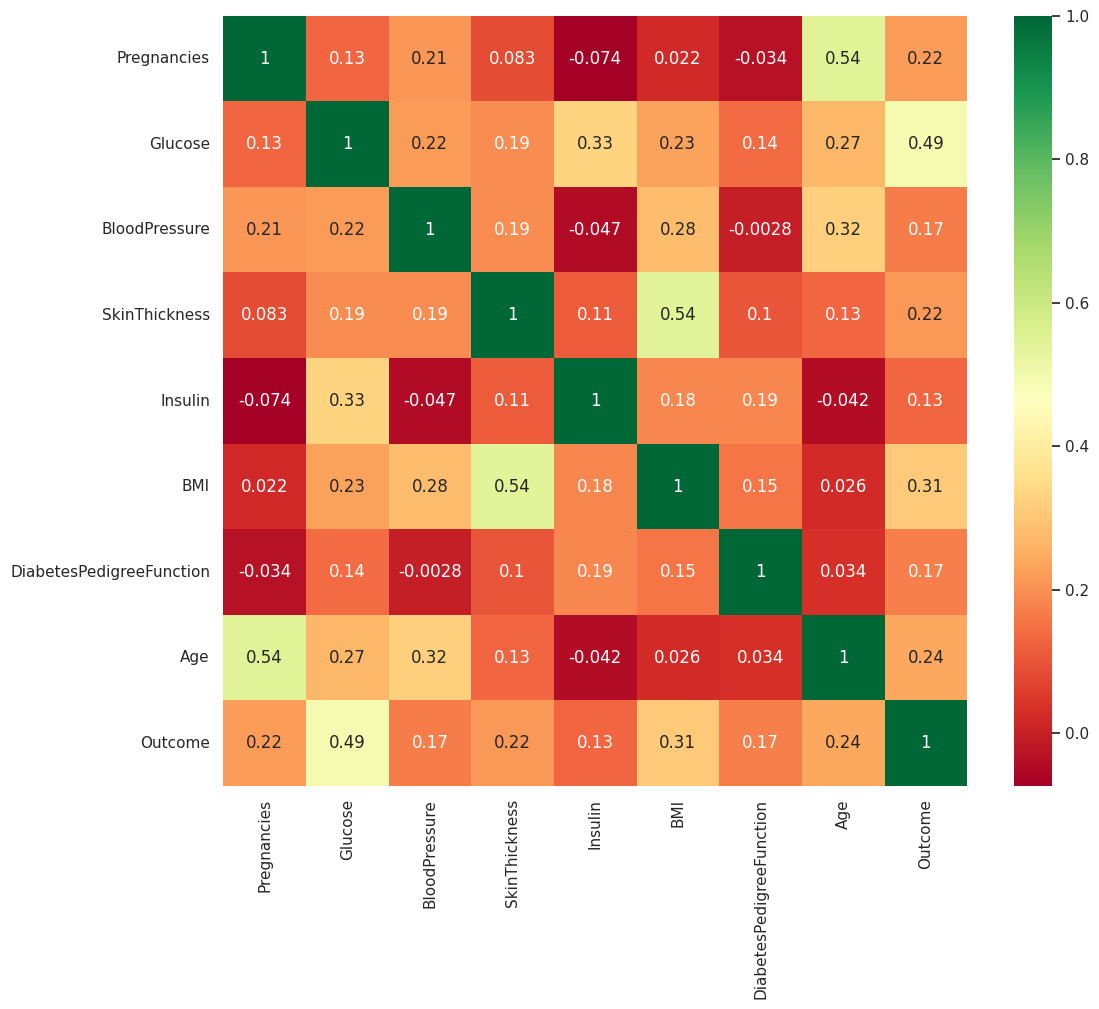

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df_copy.corr(),annot=True,cmap = 'RdYlGn')

In [ ]:
from sklearn.preprocessing import StandardScaler


In [ ]:
scaler = StandardScaler()
X =  pd.DataFrame(scaler.fit_transform(df_copy.drop(["Outcome"],axis = 1),),
        columns=['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction','Age'])

In [ ]:
y = df_copy.Outcome

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=1/3,random_state=42, stratify=y)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier


test_scores = []
train_scores = []

for i in range(1,15):
  knn = KNeighborsClassifier(i)
  knn.fit(X_train,y_train)

  train_scores.append(knn.score(X_train,y_train))
  test_scores.append(knn.score(X_test,y_test))

In [ ]:
train_scores

[1.0,
 0.837890625,
 0.8671875,
 0.802734375,
 0.82421875,
 0.796875,
 0.810546875,
 0.798828125,
 0.794921875,
 0.794921875,
 0.79296875,
 0.78515625,
 0.791015625,
 0.7890625]

In [ ]:
test_scores

[0.72265625,
 0.71875,
 0.734375,
 0.71875,
 0.75,
 0.73046875,
 0.73046875,
 0.75,
 0.78125,
 0.75390625,
 0.765625,
 0.7578125,
 0.76171875,
 0.7421875]

In [ ]:
max_train_score = max(train_scores)
train_scores_ind = [i for i, v in enumerate(train_scores) if v == max_train_score]
print('Max train score {} % and k = {}'.format(max_train_score*100,list(map(lambda x: x+1, train_scores_ind))))

Max train score 100.0 % and k = [1]


In [ ]:
max_test_score = max(test_scores)
test_scores_ind = [i for i, v in enumerate(test_scores) if v == max_test_score]
print('Max test score {} % and k = {}'.format(max_test_score*100,list(map(lambda x: x+1, test_scores_ind))))

Max test score 78.125 % and k = [9]


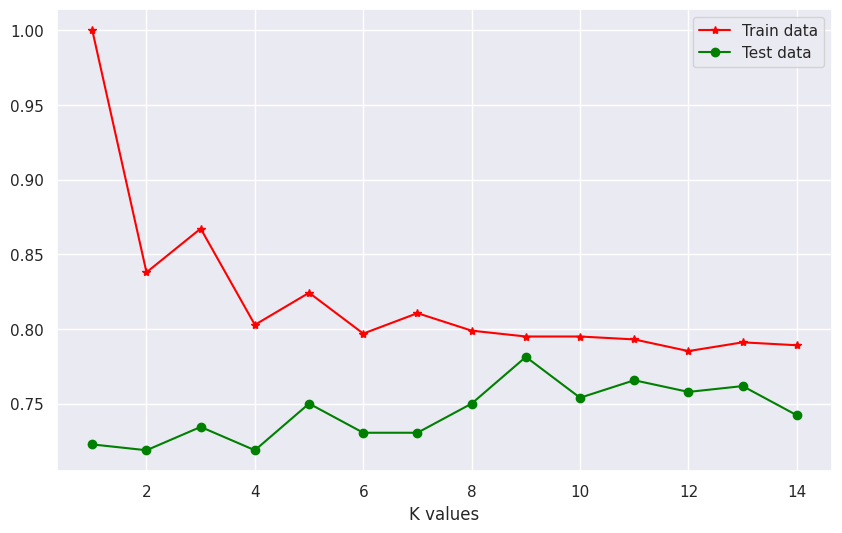

In [ ]:
plt.figure(figsize= (10,6))
plt.plot(range(1,15),train_scores, color= 'red', marker= '*', label= 'Train data')
plt.plot(range(1,15),test_scores, color= 'green', marker= 'o', label= 'Test data')

plt.xlabel('K values')
plt.legend()

In [ ]:
knn = KNeighborsClassifier(11)

knn.fit(X_train,y_train)
knn.score(X_test,y_test)

0.765625

In [ ]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
confusion_matrix(y_test,y_pred)
pd.crosstab(y_test, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,145,22,167
1,38,51,89
All,183,73,256


Text(0.5, 19.049999999999997, 'Predicted\xa0label')

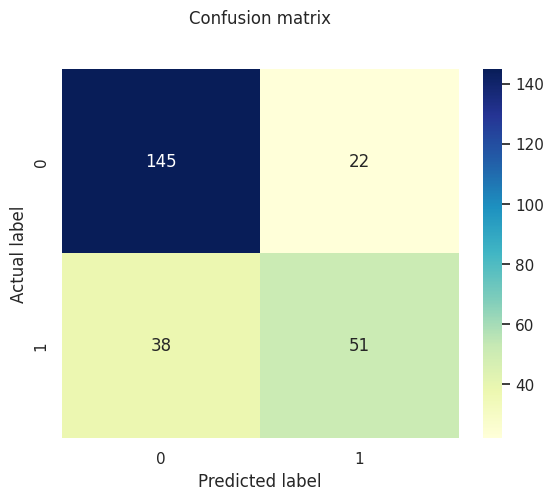

In [ ]:
y_pred = knn.predict(X_test)
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
p = sns.heatmap(pd.DataFrame(cnf_matrix),annot=True,cmap="YlGnBu",fmt='g')
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')


In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83       167
           1       0.70      0.57      0.63        89

    accuracy                           0.77       256
   macro avg       0.75      0.72      0.73       256
weighted avg       0.76      0.77      0.76       256



In [ ]:
from sklearn.metrics import roc_curve
y_pred_proba = knn.predict_proba(X_test)[:,1]
fpr,tpr, thresholds = roc_curve(y_test,y_pred_proba)

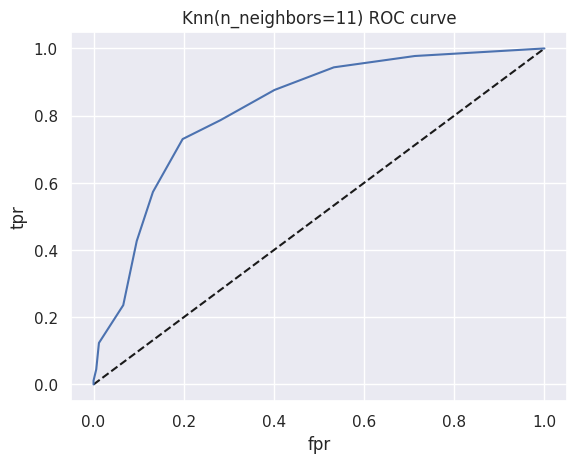

In [ ]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr, label='Knn')
plt.xlabel('fpr')
plt.ylabel('tpr')
plt.title('Knn(n_neighbors=11) ROC curve')
plt.show()

In [ ]:
from sklearn.metrics import roc_auc_score
roc_auc_score(y_test,y_pred_proba)

0.820998452533136